In [1]:
import argparse
import pathlib
import random
from collections import deque
from typing import List, Dict, Tuple, Union
from data import Dataset, SuperclassDataset
from data_utils import *
from models import BetaBernoulli
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sampling import *
from scipy.stats import beta
%matplotlib inline  

import matplotlib;matplotlib.rcParams['font.size'] = 12
import matplotlib;matplotlib.rcParams['font.family'] = 'serif'
LINEWIDTH = 13.97

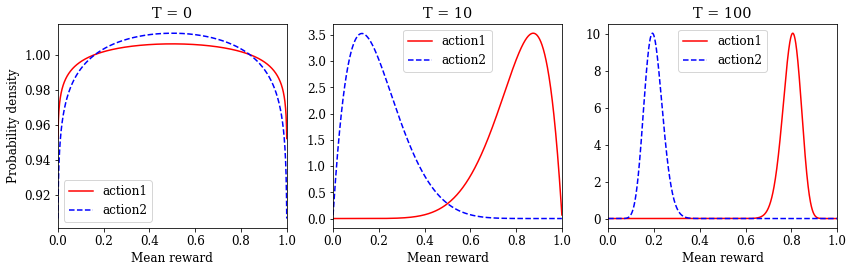

In [2]:
colors = ['r', 'b', 'g', 'c']
linestyles = ['-', '--', ':', '-.']
names = ['action1', 'action2']
x = np.linspace(0, 1, 1002)[1:-1]
Tlist = [0, 10, 100]
        
    
vals = [[1.01, 1.01, 1.02, 1.02],
        [8.01, 2.01, 2.02, 8.02],
        [80.01, 20.01, 20.02, 80.02]]

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(LINEWIDTH, 3.75))
for idx in range(3):
    T = Tlist[idx]
    alpha_values = [vals[idx][0], vals[idx][2]]
    beta_values = [vals[idx][1], vals[idx][3]]
        
    for a, b, ls, color, name in zip(alpha_values, beta_values, linestyles, colors, names):
        dist = beta(a, b)
        axes[idx].plot(x, dist.pdf(x), ls=ls, c=color, label = name)
                     # label='%s, %s' % (name, r'$\alpha=%.2f,\ \beta=%.2f$' % (a, b)))
    axes[idx].set_xlim(0, 1)
    axes[idx].set_title('T = %d' % T)
    axes[idx].set_xlabel('Mean reward')
    axes[idx].legend(loc=0, fontsize=12)
axes[0].set_ylabel(r'Probability density')


plt.show()
fig.savefig('../figures/ts_demo.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

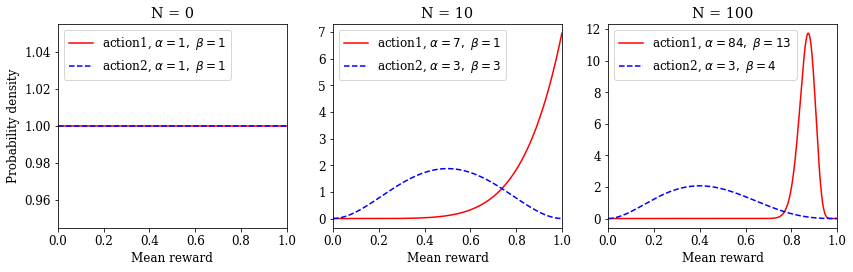

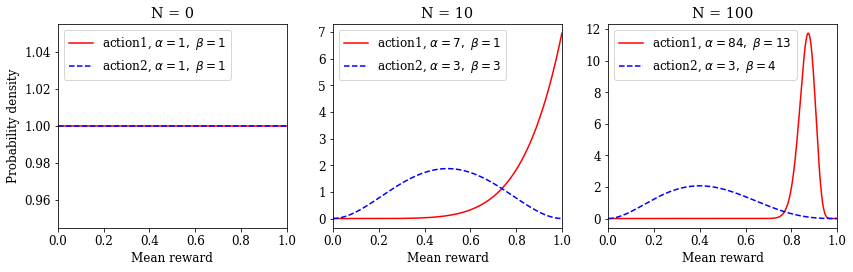

In [15]:
alpha0, beta0 = 1.0, 1.0
alpha1, beta1 = 1.0, 1.0
theta0 = 0.8
theta1 = 0.2

Tlist = [0, 10, 100, 100]
T = 100
vals = []
draws = []
for i in range(T+1):
    if i in Tlist:
        vals.append((alpha0, beta0, alpha1, beta1))
    hat_theta_0 = np.random.beta(alpha0, beta0)
    hat_theta_1 = np.random.beta(alpha1, beta1)
    if hat_theta_0 > hat_theta_1:
        if np.random.random_sample() > theta0:
            beta0 += 1
        else:
            alpha0 += 1
        draws.append(0)
    else:
        if np.random.random_sample() > theta1:
            beta1 += 1
        else:
            alpha1 += 1    
        draws.append(1)
            
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(LINEWIDTH, 3.75))
for idx in range(3):
    T = Tlist[idx]
    alpha_values = [vals[idx][0], vals[idx][2]]
    beta_values = [vals[idx][1], vals[idx][3]]
        
    for a, b, ls, color, name in zip(alpha_values, beta_values, linestyles, colors, names):
        dist = beta(a, b)
        axes[idx].plot(x, dist.pdf(x), ls=ls, c=color, label='%s, %s' % (name, r'$\alpha=%d,\ \beta=%d$' % (a, b)))
    axes[idx].set_xlim(0, 1)
    axes[idx].set_title('N = %d' % T)
    axes[idx].set_xlabel('Mean reward')
    axes[idx].legend(loc=2, fontsize=12)
axes[0].set_ylabel(r'Probability density')


plt.show()
fig.savefig('../figures/ts_demo.pdf', dpi=300, bbox_inches='tight', pad_inches=0)


fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(LINEWIDTH, 3.75))
for idx in range(3):
    T = Tlist[idx]
    alpha_values = [vals[idx][0], vals[idx][2]]
    beta_values = [vals[idx][1], vals[idx][3]]
        
    for a, b, ls, color, name in zip(alpha_values, beta_values, linestyles, colors, names):
        dist = beta(a, b)
        axes[idx].plot(x, dist.pdf(x), ls=ls, c=color, label='%s, %s' % (name, r'$\alpha=%d,\ \beta=%d$' % (a, b)))
    axes[idx].set_xlim(0, 1)
    axes[idx].set_title('N = %d' % T)
    axes[idx].set_xlabel('Mean reward')
    axes[idx].legend(loc=2, fontsize=12)
axes[0].set_ylabel(r'Probability density')


plt.show()
#fig.savefig('../figures/ts_demo.pdf', dpi=300, bbox_inches='tight', pad_inches=0)

In [4]:
T = 100
num_runs = 10000
draws = np.zeros((num_runs, T))
for n in range(num_runs):
    alpha0, beta0, alpha1, beta1 = 1,1,1,1
    for i in range(T):
        hat_theta_0 = np.random.beta(alpha0, beta0)
        hat_theta_1 = np.random.beta(alpha1, beta1)
        if hat_theta_0 > hat_theta_1:
            if np.random.random_sample() > theta0:
                beta0 += 1
            else:
                alpha0 += 1
            draws[n,i] = 0
        else:
            if np.random.random_sample() > theta1:
                beta1 += 1
            else:
                alpha1 += 1    
            draws[n,i] = 1    

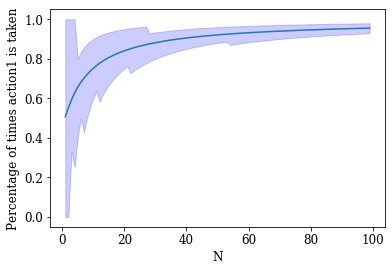

In [6]:
plt.plot(figsize=(5,1))
vals = 1 - np.array([[draws[n,:i].sum()/i for i in range(T)] for n in range(num_runs)]) # percentage of action0
plt.plot(np.mean(vals, axis=0))
plt.fill_between(np.arange(T),
                 np.quantile(vals, 0.125, axis=0), 
                 np.quantile(vals, 0.875, axis=0), 
                    color=color, alpha=.2)
plt.xlabel('N')
plt.ylabel('Percentage of times action1 is taken')
plt.savefig('../figures/ts_demo_percentage.pdf', dpi=300, bbox_inches='tight', pad_inches=0)